# From STAC to Data: Working with EOPF Zarr

This tutorial demonstrates how to discover, access, and analyze Earth Observation data using STAC (SpatioTemporal Asset Catalog) and EOPF Zarr datasets. Perfect for beginners in Earth observation data processing!

## What You'll Learn:

1. **STAC Discovery**: Connect to catalogs and search for satellite data
2. **Zarr Access**: Open cloud-optimized datasets through STAC
3. **Data Structure**: Understand EOPF Zarr organization with visualizations
4. **Data Exploration**: Master common techniques for examining datasets
5. **Basic Analysis**: Perform simple data analysis examples

## Prerequisites

This tutorial requires the following Python packages:
- `pystac` and `pystac-client` for STAC operations
- `xarray` for data manipulation
- `matplotlib` for visualization
- `numpy` for numerical operations

## Key Concepts

- **STAC**: A specification for describing geospatial data in a standardized way
- **EOPF**: Earth Observation Processing Framework for cloud-native data processing
- **Zarr**: A cloud-optimized data format for large multi-dimensional arrays
- **DataTree**: xarray extension for hierarchical datasets

## 1. Import Required Libraries

In [34]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Optional
from pystac import MediaType
from pystac_client import Client
from datetime import datetime
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Helper Functions

In [35]:
def list_found_elements(search_result):
    """
    Extract item IDs and collection IDs from STAC search results.
    
    Parameters:
    -----------
    search_result : pystac_client.ItemSearch
        The search result object from STAC API
    
    Returns:
    --------
    tuple: (list of item IDs, list of collection IDs)
    """
    ids = []
    collections = []
    for item in search_result.items():
        ids.append(item.id)
        collections.append(item.collection_id)
    return ids, collections

print("✅ Helper functions defined!")

✅ Helper functions defined!


## 3. Connect to EOPF STAC API

STAC catalogs are like digital libraries that help us find and access satellite data.

In [36]:
# EOPF STAC API endpoint
eopf_stac_api_root_endpoint = "https://stac.core.eopf.eodc.eu/"

# Connect to the STAC catalog
print("🔗 Connecting to EOPF STAC catalog...")
client = Client.open(url=eopf_stac_api_root_endpoint)

print(f"\n✅ Successfully connected to catalog!")
print(f"📋 Catalog ID: {client.id}")
print(f"🌐 URL: {eopf_stac_api_root_endpoint}")

🔗 Connecting to EOPF STAC catalog...

✅ Successfully connected to catalog!
📋 Catalog ID: eopf-sample-service-stac-api
🌐 URL: https://stac.core.eopf.eodc.eu/


## 4. Search for Satellite Data

Let's search for Sentinel-2 Level 2A data over Innsbruck, Austria.

### Understanding Search Parameters:
- **Bounding Box (bbox)**: Geographic area [min_lon, min_lat, max_lon, max_lat]
- **Collections**: Type of satellite data (Sentinel-2 L2A = surface reflectance)
- **DateTime**: Time range for the search

In [37]:
# Define search parameters
innsbruck_bbox = (11.124756, 47.311058, 11.459839, 47.463624)
collection_name = 'sentinel-2-l2a'
time_range = '2020-05-01T00:00:00Z/2025-05-31T23:59:59.999999Z'

print("🔍 Searching for Sentinel-2 data...")
print(f"📍 Area: Innsbruck, Austria {innsbruck_bbox}")
print(f"🛰️  Collection: {collection_name}")
print(f"📅 Time range: May 2020 - May 2025")

# Perform the search
search_results = client.search(
    bbox=innsbruck_bbox,
    collections=[collection_name],
    datetime=time_range
)

# Extract results
item_ids, collection_ids = list_found_elements(search_results)

print(f"\n✅ Search completed!")
print(f"📊 Found {len(item_ids)} Sentinel-2 L2A items")
if item_ids:
    print(f"🔢 First few item IDs:")
    for i, item_id in enumerate(item_ids[:3]):
        print(f"   {i+1}. {item_id}")

🔍 Searching for Sentinel-2 data...
📍 Area: Innsbruck, Austria (11.124756, 47.311058, 11.459839, 47.463624)
🛰️  Collection: sentinel-2-l2a
📅 Time range: May 2020 - May 2025

✅ Search completed!
📊 Found 27 Sentinel-2 L2A items
🔢 First few item IDs:
   1. S2B_MSIL2A_20250530T101559_N0511_R065_T32TPT_20250530T130924
   2. S2A_MSIL2A_20250527T102041_N0511_R065_T32TPT_20250527T165916
   3. S2B_MSIL2A_20250527T100559_N0511_R022_T32TPT_20250527T155229


## 5. Access Collection and Item Details

In [38]:
# Get the Sentinel-2 collection
print("📚 Accessing Sentinel-2 L2A collection...")
sentinel2_collection = client.get_collection(collection_name)

# Select the first item
selected_item_id = item_ids[0]
selected_item = sentinel2_collection.get_item(selected_item_id)

print(f"\n🎯 Selected item: {selected_item.id}")
print(f"📅 Acquisition date: {selected_item.datetime}")
print(f"🌍 Geometry: {selected_item.geometry['type']}")

# List available assets
print(f"\n🗂️  Available assets:")
for asset_name, asset in list(selected_item.assets.items())[:5]:
    print(f"   📄 {asset_name}: {asset.title or 'No title'}")
    if hasattr(asset, 'media_type'):
        print(f"      Type: {asset.media_type}")
if len(selected_item.assets) > 5:
    print(f"   ... and {len(selected_item.assets) - 5} more assets")

📚 Accessing Sentinel-2 L2A collection...

🎯 Selected item: S2B_MSIL2A_20250530T101559_N0511_R065_T32TPT_20250530T130924
📅 Acquisition date: 2025-05-30 10:15:59.024000+00:00
🌍 Geometry: Polygon

🗂️  Available assets:
   📄 SR_10m: Surface Reflectance - 10m
      Type: application/vnd+zarr
   📄 SR_20m: Surface Reflectance - 20m
      Type: application/vnd+zarr
   📄 SR_60m: Surface Reflectance - 60m
      Type: application/vnd+zarr
   📄 AOT_10m: Aerosol optical thickness (AOT)
      Type: application/vnd+zarr
   📄 B01_20m: Coastal aerosol (band 1) - 20m
      Type: application/vnd+zarr
   ... and 16 more assets


## 6. Discover Zarr Assets

EOPF data is stored in Zarr format, optimized for cloud access.

In [39]:
print("🔍 Searching for Zarr assets...")

# Find Zarr assets
zarr_assets = selected_item.get_assets(media_type=MediaType.ZARR)
top_level_zarr_asset = None

print(f"\n📦 Found {len(zarr_assets)} Zarr assets:")
print("=" * 50)

for asset_name, asset in sorted(zarr_assets.items(), key=lambda x: x[1].href):
    roles = asset.roles or []
    group_path = "".join(asset.href.split(".zarr")[-1:]) or "/"
    
    print(f"\n📁 Asset: {asset.title or asset_name}")
    print(f"   Path: {group_path}")
    print(f"   Roles: {roles}")
    
    # Identify the main data asset
    if "data" in roles and "metadata" in roles:
        top_level_zarr_asset = asset
        print(f"   ⭐ This is the TOP-LEVEL Zarr group!")

# Verify we found the main asset
if top_level_zarr_asset is None:
    raise ValueError("❌ Unable to find top-level Zarr group asset")

print(f"\n✅ Main Zarr asset identified: {top_level_zarr_asset.title}")

🔍 Searching for Zarr assets...

📦 Found 20 Zarr assets:

📁 Asset: EOPF Product
   Path: /
   Roles: ['data', 'metadata']
   ⭐ This is the TOP-LEVEL Zarr group!

📁 Asset: Scene classification map (SCL)
   Path: /conditions/mask/l2a_classification/r20m/scl
   Roles: ['data']

📁 Asset: Surface Reflectance - 10m
   Path: /measurements/reflectance/r10m
   Roles: ['data', 'reflectance', 'dataset']

📁 Asset: Blue (band 2) - 10m
   Path: /measurements/reflectance/r10m/b02
   Roles: ['data', 'reflectance']

📁 Asset: Green (band 3) - 10m
   Path: /measurements/reflectance/r10m/b03
   Roles: ['data', 'reflectance']

📁 Asset: Red (band 4) - 10m
   Path: /measurements/reflectance/r10m/b04
   Roles: ['data', 'reflectance']

📁 Asset: NIR 1 (band 8) - 10m
   Path: /measurements/reflectance/r10m/b08
   Roles: ['data', 'reflectance']

📁 Asset: Surface Reflectance - 20m
   Path: /measurements/reflectance/r20m
   Roles: ['data', 'reflectance', 'dataset']

📁 Asset: Coastal aerosol (band 1) - 20m
   Path: /

## 7. Open the Zarr Dataset

Now we'll open the satellite data using xarray's DataTree for hierarchical datasets.

In [40]:
print("🚀 Opening Zarr dataset with xarray DataTree...")
print(f"📡 Data URL: {top_level_zarr_asset.href}")

try:
    # Open the dataset using EOPF-specific engine
    datatree = xr.open_datatree(
        top_level_zarr_asset.href,
        engine="eopf-zarr",  # EOPF-specific Zarr engine
        op_mode="native",    # Native operation mode
        chunks={}            # Let xarray handle chunking
    )
    
    print(f"\n✅ Dataset opened successfully!")
    print(f"📊 DataTree type: {type(datatree)}")
    print(f"🌳 Number of groups: {len(datatree.groups)}")
    
except Exception as e:
    print(f"❌ Error opening dataset: {e}")
    print("This might be due to network issues or dataset access permissions.")
    raise

🚀 Opening Zarr dataset with xarray DataTree...
📡 Data URL: https://objects.eodc.eu:443/e05ab01a9d56408d82ac32d69a5aae2a:202505-s02msil2a/30/products/cpm_v256/S2B_MSIL2A_20250530T101559_N0511_R065_T32TPT_20250530T130924.zarr

✅ Dataset opened successfully!
📊 DataTree type: <class 'xarray.core.datatree.DataTree'>
🌳 Number of groups: 36


## 8. Explore Dataset Structure

Let's examine the hierarchical organization of our EOPF dataset.

In [41]:
print("🎨 Exploring dataset structure...")

# List all groups
groups = list(datatree.groups)
print(f"\n📁 Dataset Groups ({len(groups)} total):")
print("=" * 40)

for i, group in enumerate(sorted(groups), 1):
    print(f"{i:2d}. {group if group else '/ (root)'}")

print(f"\n💡 Understanding the Structure:")
print(f"   • Each group organizes related data")
print(f"   • Groups contain measurements, metadata, or quality info")
print(f"   • Variables are the actual data arrays")
print(f"   • Coordinates define spatial and temporal dimensions")

🎨 Exploring dataset structure...

📁 Dataset Groups (36 total):
 1. /
 2. /conditions
 3. /conditions/geometry
 4. /conditions/mask
 5. /conditions/mask/detector_footprint
 6. /conditions/mask/detector_footprint/r10m
 7. /conditions/mask/detector_footprint/r20m
 8. /conditions/mask/detector_footprint/r60m
 9. /conditions/mask/l1c_classification
10. /conditions/mask/l1c_classification/r60m
11. /conditions/mask/l2a_classification
12. /conditions/mask/l2a_classification/r20m
13. /conditions/mask/l2a_classification/r60m
14. /conditions/meteorology
15. /conditions/meteorology/cams
16. /conditions/meteorology/ecmwf
17. /measurements
18. /measurements/reflectance
19. /measurements/reflectance/r10m
20. /measurements/reflectance/r20m
21. /measurements/reflectance/r60m
22. /quality
23. /quality/atmosphere
24. /quality/atmosphere/r10m
25. /quality/atmosphere/r20m
26. /quality/atmosphere/r60m
27. /quality/l2a_quicklook
28. /quality/l2a_quicklook/r10m
29. /quality/l2a_quicklook/r20m
30. /quality/l2a

## 9. Examine Root Dataset

In [42]:
# Examine the root dataset
root_dataset = datatree.ds

print("📊 Root Dataset Information")
print("=" * 40)
print(f"🔢 Dimensions: {dict(root_dataset.dims)}")
print(f"📏 Data Variables: {list(root_dataset.data_vars.keys())}")
print(f"🗺️  Coordinates: {list(root_dataset.coords.keys())}")

if root_dataset.attrs:
    print(f"\n📝 Attributes (first 3):")
    for key, value in list(root_dataset.attrs.items())[:3]:
        print(f"   {key}: {str(value)[:80]}{'...' if len(str(value)) > 80 else ''}")

📊 Root Dataset Information
🔢 Dimensions: {}
📏 Data Variables: []
🗺️  Coordinates: []

📝 Attributes (first 3):
   other_metadata: {'AOT_retrieval_model': 'SEN2COR_DDV', 'L0_ancillary_data_quality': '4', 'L0_eph...
   stac_discovery: {'assets': {'analytic': {'eo:bands': [{'center_wavelength': 0.4423, 'common_name...


## 10. Explore a Data Group

Let's examine one of the data groups in detail.

In [43]:
# Get /measurements/reflectance/r10m group
interesting_groups = [
    group for group in groups if group.startswith('/measurements/reflectance/r10m')
    and datatree[group].ds.data_vars
]
print(f"\n🔍 Searching for groups with data variables in '/measurements/reflectance/r10m'...")

if interesting_groups:
    sample_group = interesting_groups[0]
    group_ds = datatree[sample_group].ds
    
    print(f"📊 Group '{sample_group}' Information")
    print("=" * 50)
    print(f"🔢 Dimensions: {dict(group_ds.dims)}")
    print(f"📏 Data Variables: {list(group_ds.data_vars.keys())}")
    print(f"🗺️  Coordinates: {list(group_ds.coords.keys())}")
    
    # Show details of first data variable
    if group_ds.data_vars:
        var_name = list(group_ds.data_vars.keys())[0]
        var = group_ds.data_vars[var_name]
        print(f"\n🔍 Sample Variable '{var_name}':")
        print(f"   Shape: {var.shape}")
        print(f"   Dimensions: {var.dims}")
        print(f"   Data type: {var.dtype}")
else:
    print("No groups with data variables found in the first 5 groups.")


🔍 Searching for groups with data variables in '/measurements/reflectance/r10m'...
📊 Group '/measurements/reflectance/r10m' Information
🔢 Dimensions: {'y': 10980, 'x': 10980}
📏 Data Variables: ['b02', 'b03', 'b04', 'b08']
🗺️  Coordinates: ['x', 'y']

🔍 Sample Variable 'b02':
   Shape: (10980, 10980)
   Dimensions: ('y', 'x')
   Data type: float64


## 11. Data Visualization and Band Combinations

Let's create beautiful visualizations of our satellite data, including RGB band combinations.

🎨 Creating visualizations for group: /measurements/reflectance/r10m
Available variables: ['b02', 'b03', 'b04', 'b08']
🌈 Creating RGB Visualization
Available bands: ['b02', 'b03', 'b04', 'b08']
Requested RGB bands: ['b04', 'b03', 'b02']


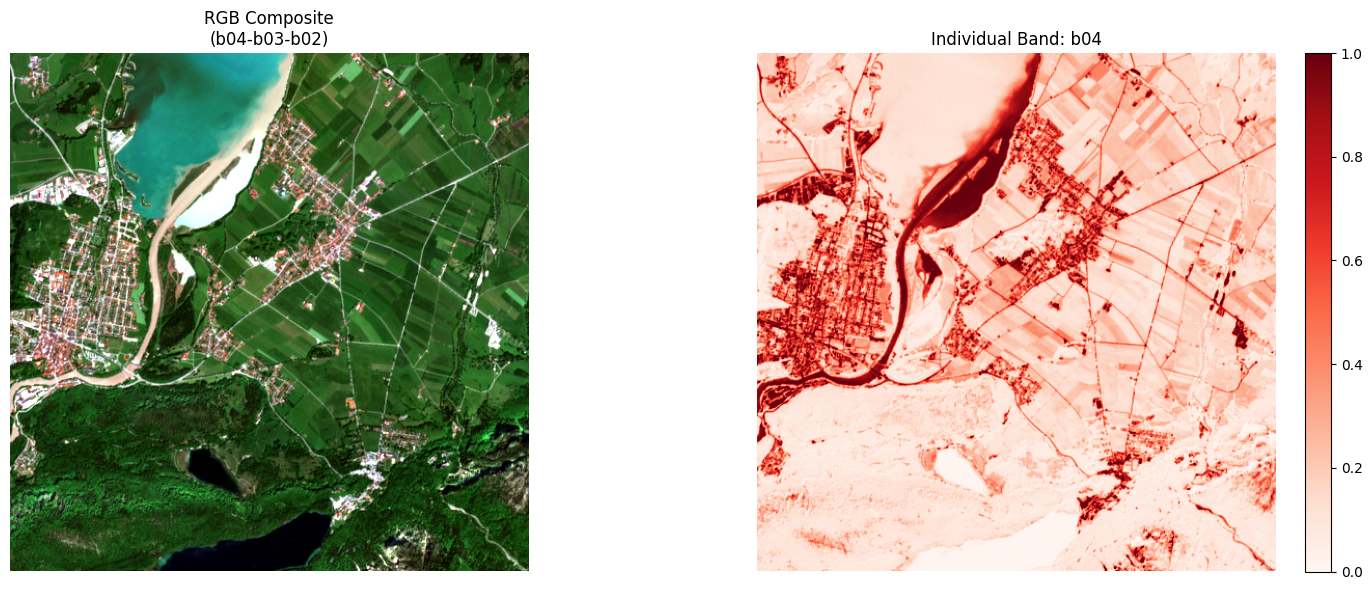

✅ RGB visualization created successfully!
📊 Image shape: (500, 500, 3)


In [44]:
def create_rgb_visualization(dataset, red_band='b04', green_band='b03', blue_band='b02', 
                           subset_size=500, enhance_contrast=True):
    """
    Create RGB visualization from Sentinel-2 bands.
    
    Parameters:
    -----------
    dataset : xarray.Dataset
        Dataset containing the spectral bands
    red_band, green_band, blue_band : str
        Names of the bands to use for RGB channels
    subset_size : int
        Maximum size for spatial dimensions (for performance)
    enhance_contrast : bool
        Whether to apply contrast enhancement
    """
    try:
        # Check if the required bands exist
        available_bands = list(dataset.data_vars.keys())
        rgb_bands = [red_band, green_band, blue_band]
        
        print(f"🌈 Creating RGB Visualization")
        print(f"Available bands: {available_bands}")
        print(f"Requested RGB bands: {rgb_bands}")
        
        # Find bands that exist
        existing_bands = [band for band in rgb_bands if band in available_bands]
        
        if len(existing_bands) >= 3:
            # Use the first 3 available bands for RGB
            r_band, g_band, b_band = existing_bands[:3]
            
            # Extract band data
            red = dataset[r_band]
            green = dataset[g_band]
            blue = dataset[b_band]
            
            # Subset for performance
            spatial_dims = [dim for dim in red.dims if dim in ['x', 'y', 'longitude', 'latitude']]
            if len(spatial_dims) >= 2:
                subset_dict = {}
                for dim in spatial_dims:
                    size = red.sizes[dim]
                    if size > subset_size:
                        start = size // 4  # Start from 1/4 of the image
                        end = start + subset_size
                        subset_dict[dim] = slice(start, min(end, size))
                
                if subset_dict:
                    red = red.isel(subset_dict)
                    green = green.isel(subset_dict)
                    blue = blue.isel(subset_dict)
            
            # Handle time dimension if present
            if 'time' in red.dims:
                red = red.isel(time=0)
                green = green.isel(time=0)
                blue = blue.isel(time=0)
            
            # Convert to numpy arrays
            r_data = red.values
            g_data = green.values
            b_data = blue.values
            
            # Normalize to 0-1 range
            def normalize_band(band_data):
                # Remove NaN values for percentile calculation
                valid_data = band_data[~np.isnan(band_data)]
                if len(valid_data) == 0:
                    return np.zeros_like(band_data)
                
                if enhance_contrast:
                    # Use 2nd and 98th percentiles for contrast stretching
                    p2, p98 = np.percentile(valid_data, [2, 98])
                    normalized = np.clip((band_data - p2) / (p98 - p2), 0, 1)
                else:
                    # Simple min-max normalization
                    min_val, max_val = np.nanmin(band_data), np.nanmax(band_data)
                    normalized = (band_data - min_val) / (max_val - min_val)
                
                # Replace NaN with 0
                normalized[np.isnan(normalized)] = 0
                return normalized
            
            r_norm = normalize_band(r_data)
            g_norm = normalize_band(g_data)
            b_norm = normalize_band(b_data)
            
            # Stack into RGB array
            rgb_array = np.stack([r_norm, g_norm, b_norm], axis=-1)
            
            # Create the plot
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # RGB composite
            ax1.imshow(rgb_array)
            ax1.set_title(f'RGB Composite\n({r_band}-{g_band}-{b_band})', fontsize=12)
            ax1.axis('off')
            
            # Individual band (red channel as example)
            im = ax2.imshow(r_norm, cmap='Reds')
            ax2.set_title(f'Individual Band: {r_band}', fontsize=12)
            ax2.axis('off')
            plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
            
            plt.tight_layout()
            plt.show()
            
            print(f"✅ RGB visualization created successfully!")
            print(f"📊 Image shape: {rgb_array.shape}")
            
        else:
            print(f"⚠️  Not enough bands for RGB visualization.")
            print(f"Found {len(existing_bands)} bands: {existing_bands}")
            
            # Create single band visualization instead
            if available_bands:
                create_single_band_visualization(dataset, available_bands[0], subset_size)
    
    except Exception as e:
        print(f"❌ Error creating RGB visualization: {e}")
        print("Trying alternative visualization...")
        
        # Fallback to simple visualization
        if dataset.data_vars:
            var_name = list(dataset.data_vars.keys())[0]
            create_single_band_visualization(dataset, var_name, subset_size)

def create_single_band_visualization(dataset, band_name, subset_size=500):
    """
    Create visualization for a single band.
    """
    try:
        var = dataset[band_name]
        
        print(f"\n📈 Single Band Analysis: '{band_name}'")
        print(f"   Shape: {var.shape}")
        print(f"   Dimensions: {var.dims}")
        
        # Subset the data
        subset_dict = {}
        for dim in var.dims:
            size = var.sizes[dim]
            if size > subset_size and dim in ['x', 'y', 'longitude', 'latitude']:
                start = size // 4
                end = start + subset_size
                subset_dict[dim] = slice(start, min(end, size))
        
        if subset_dict:
            var_subset = var.isel(subset_dict)
        else:
            var_subset = var
        
        # Handle time dimension
        if 'time' in var_subset.dims:
            var_subset = var_subset.isel(time=0)
        
        # Calculate statistics
        print(f"   Min: {var_subset.min().values:.4f}")
        print(f"   Max: {var_subset.max().values:.4f}")
        print(f"   Mean: {var_subset.mean().values:.4f}")
        
        # Create visualization
        if len(var_subset.dims) >= 2:
            plt.figure(figsize=(12, 5))
            
            # Main plot
            plt.subplot(1, 2, 1)
            if len(var_subset.dims) == 2:
                im = plt.imshow(var_subset.values, cmap='viridis')
                plt.colorbar(im, fraction=0.046, pad=0.04)
            else:
                # For 3D+ data, plot the first slice
                first_slice = var_subset.isel({var_subset.dims[0]: 0})
                im = plt.imshow(first_slice.values, cmap='viridis')
                plt.colorbar(im, fraction=0.046, pad=0.04)
            
            plt.title(f'Band: {band_name}')
            plt.axis('off')
            
            # Histogram
            plt.subplot(1, 2, 2)
            data_flat = var_subset.values.flatten()
            data_clean = data_flat[~np.isnan(data_flat)]
            if len(data_clean) > 0:
                plt.hist(data_clean, bins=50, alpha=0.7, edgecolor='black')
                plt.xlabel('Value')
                plt.ylabel('Frequency')
                plt.title(f'Distribution: {band_name}')
                plt.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
    except Exception as e:
        print(f"❌ Error in single band visualization: {e}")

# Try to create visualizations
if interesting_groups:
    try:
        sample_group = interesting_groups[0]
        group_ds = datatree[sample_group].ds
        
        print(f"🎨 Creating visualizations for group: {sample_group}")
        print(f"Available variables: {list(group_ds.data_vars.keys())}")
        
        # Try RGB visualization first
        create_rgb_visualization(group_ds)
        
    except Exception as e:
        print(f"⚠️  Could not create visualizations: {e}")
        print("This might be due to data access restrictions or large data size.")
        
        # Fallback: show basic info
        if group_ds.data_vars:
            var_name = list(group_ds.data_vars.keys())[0]
            var = group_ds.data_vars[var_name]
            print(f"\n📊 Basic info for '{var_name}':")
            print(f"   Shape: {var.shape}")
            print(f"   Data type: {var.dtype}")
            print(f"   Dimensions: {var.dims}")
else:
    print("No suitable data found for visualization.")
    print("\n💡 Visualization Tips:")
    print("   • Look for groups containing spectral bands (B01, B02, B03, B04, etc.)")
    print("   • Common Sentinel-2 RGB combinations:")
    print("     - True Color: R=B04, G=B03, B=B02")
    print("     - False Color: R=B08, G=B04, B=B03")
    print("     - SWIR: R=B12, G=B8A, B=B04")

## Summary

🎉 **Congratulations!** You've successfully completed the EOPF STAC and Zarr tutorial!

### What You Accomplished:

1. ✅ **Connected to EOPF STAC API** - Accessed the Earth Observation data catalog
2. ✅ **Searched for satellite data** - Found Sentinel-2 L2A data over Innsbruck, Austria
3. ✅ **Identified Zarr assets** - Located cloud-optimized data assets
4. ✅ **Opened with xarray DataTree** - Successfully loaded hierarchical satellite data
5. ✅ **Explored data structure** - Examined dataset organization and groups
6. ✅ **Performed basic analysis** - Computed statistics and created visualizations

### Key Concepts Learned:
- **STAC**: Standard for describing geospatial data
- **EOPF**: Earth Observation Processing Framework for cloud-native processing
- **Zarr**: Cloud-optimized data format for large arrays
- **DataTree**: Tool for working with hierarchical datasets

### Next Steps:
- Explore additional notebooks for advanced analysis techniques
- Try different geographic areas and time ranges
- Experiment with other satellite collections
- Apply geospatial operations and transformations

### Additional Resources:
- [EOPF Documentation](https://eopf.readthedocs.io/)
- [STAC Specification](https://stacspec.org/)
- [Xarray Documentation](https://docs.xarray.dev/)
- [Zarr Documentation](https://zarr.readthedocs.io/)